<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/excercise2(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("standardscaler.csv")
df.head()

,Feature1,Feature2,Feature3,Target
0,7,506815,78179.054805,147107.322662
1,4,293822,70538.588873,127684.231772
2,8,77218,44636.920014,87982.249559
3,5,588518,86421.631346,166046.587018
4,7,771044,55814.069145,101011.603738


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   int64  
 1   Feature2  1000 non-null   int64  
 2   Feature3  1000 non-null   float64
 3   Target    1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [6]:
df[df.duplicated()]

,Feature1,Feature2,Feature3,Target


#Normallity check

<Axes: xlabel='Feature1', ylabel='Count'>

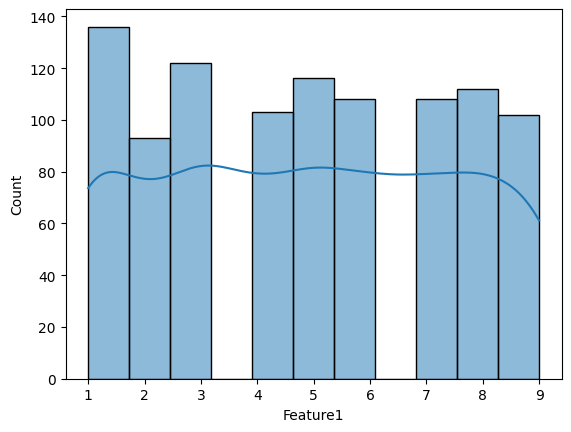

In [7]:
import seaborn as sns
sns.histplot(df['Feature1'],kde=True)

In [24]:
from scipy.stats import anderson
res=anderson(df['Feature1'],dist='norm')
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


<Axes: xlabel='Feature2', ylabel='Count'>

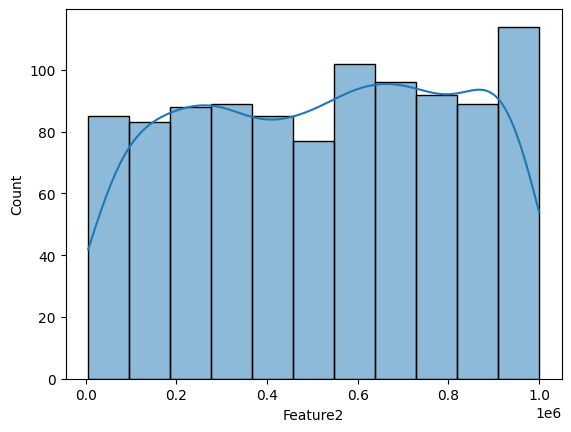

In [8]:
import seaborn as sns
sns.histplot(df['Feature2'],kde=True)

In [22]:
from scipy.stats import anderson
res=anderson(df['Feature2'],dist='norm')
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


<Axes: xlabel='Feature3', ylabel='Count'>

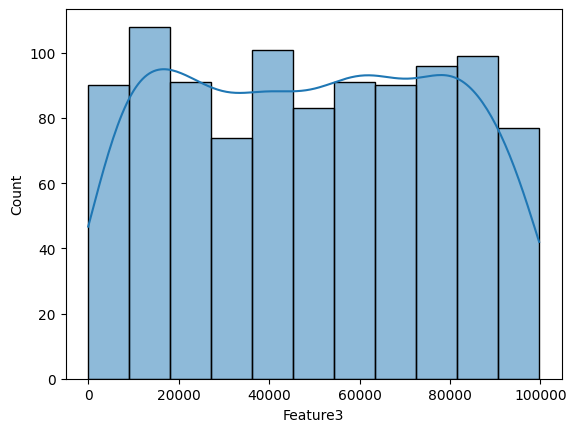

In [10]:
import seaborn as sns
sns.histplot(df['Feature3'],kde=True)

In [21]:
from scipy.stats import anderson
res=anderson(df['Feature3'],dist='norm')
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


<Axes: xlabel='Target', ylabel='Count'>

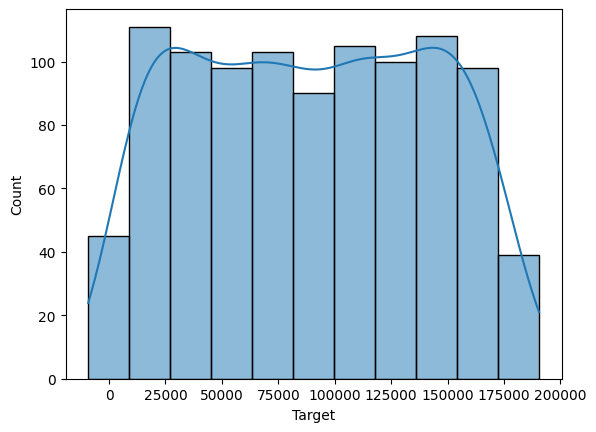

In [11]:
import seaborn as sns
sns.histplot(df['Target'],kde=True)

In [25]:
from scipy.stats import anderson
res=anderson(df['Target'],dist='norm')
if res.statistic<res.critical_values[2]:
  print('normally distributed')
else:
  print('not-normally distributed')

not-normally distributed


#outlier checking

<Axes: ylabel='Feature1'>

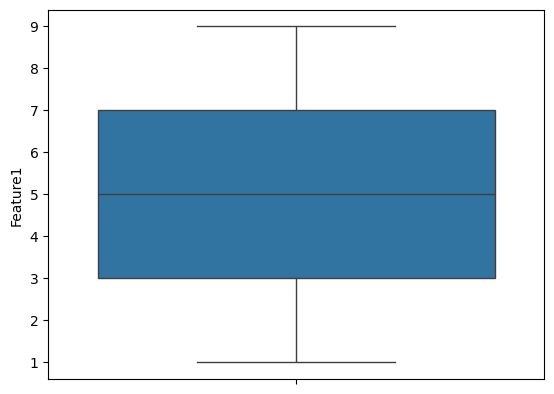

In [28]:
import seaborn as sns
sns.boxplot(data=df,y='Feature1')

<Axes: ylabel='Feature2'>

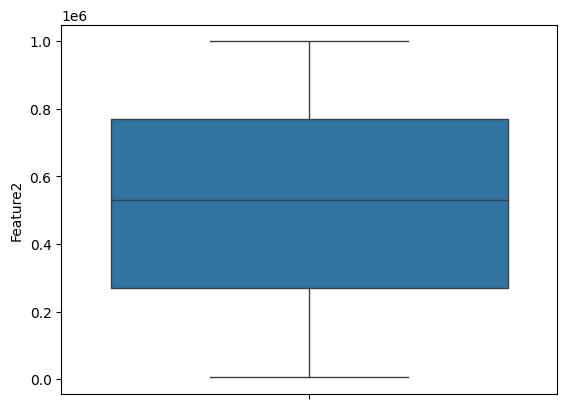

In [29]:
import seaborn as sns
sns.boxplot(data=df,y='Feature2')

<Axes: ylabel='Feature3'>

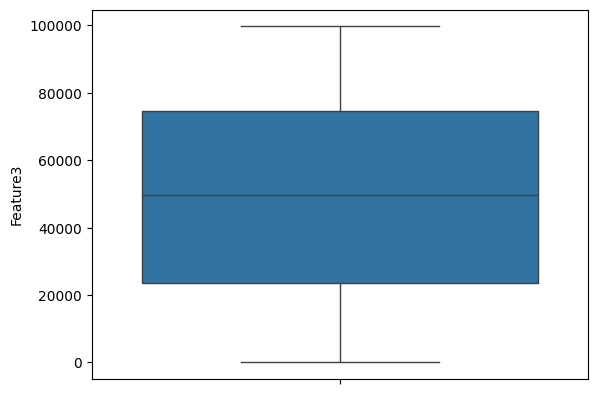

In [30]:
import seaborn as sns
sns.boxplot(data=df,y='Feature3')

<Axes: ylabel='Target'>

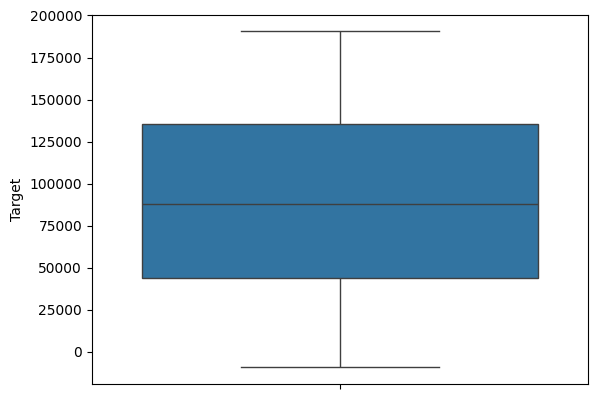

In [31]:
import seaborn as sns
sns.boxplot(data=df,y='Target')

#linearity check

<Axes: xlabel='Feature1', ylabel='Target'>

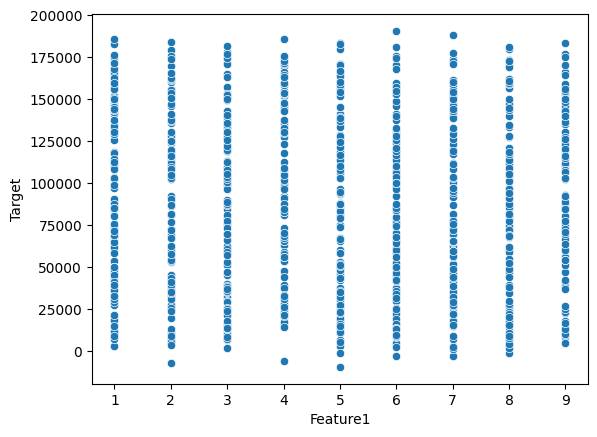

In [13]:
import seaborn as sns
sns.scatterplot(data=df,x='Feature1',y='Target')

<Axes: xlabel='Feature2', ylabel='Target'>

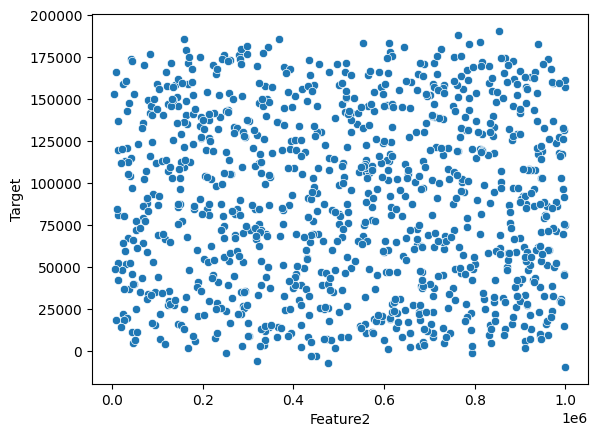

In [15]:
import seaborn as sns
sns.scatterplot(data=df,x='Feature2',y='Target')

<Axes: xlabel='Feature3', ylabel='Target'>

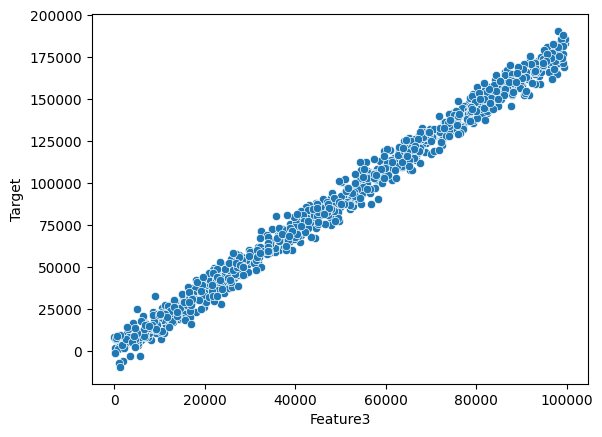

In [16]:
import seaborn as sns
sns.scatterplot(data=df,x='Feature3',y='Target')

# Feature selection

In [32]:
from scipy.stats import spearmanr
spearmanr(df['Feature1'],df['Target'])

SignificanceResult(statistic=np.float64(-0.03873572192658725), pvalue=np.float64(0.22100566349176176))

In [33]:
from scipy.stats import spearmanr
spearmanr(df['Feature2'],df['Target'])

SignificanceResult(statistic=np.float64(-0.024340980340980343), pvalue=np.float64(0.44196420435205785))

In [41]:
from scipy.stats import pearsonr
pearsonr(df['Feature3'],df['Target'])

PearsonRResult(statistic=np.float64(0.9951350956197993), pvalue=np.float64(0.0))

In [39]:
df.corr(method='pearson').Target

,Target
Feature1,-0.037666
Feature2,-0.024257
Feature3,0.995135
Target,1.000000


In [40]:
df.corr(method='spearman').Target

,Target
Feature1,-0.038736
Feature2,-0.024341
Feature3,0.995229
Target,1.000000


# feature3 only has high correlation with target

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df[['Feature3']]
y=df.Target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=model.predict(x_train)
r2_train=r2_score(y_train,y_pred)
mse_train=mean_squared_error(y_train,y_pred)
y_pred=model.predict(x_test)
r2_test=r2_score(y_test,y_pred)
mse_test=mean_squared_error(y_test,y_pred)
print('mse_train ',mse_train)
print('mse_test ',mse_test)
print('r2_train ',r2_train)
print('r2_test ',r2_test)
if (r2_train-r2_test) > .2:
  print('overfit')
elif(r2_train-r2_test) < -.2:
  print('underfit')
else:
  print('goodfit')

mse_train  26537776.85608167
mse_test  25623504.99123415
r2_train  0.9902778800183957
r2_test  0.9903250639024012
goodfit
